In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Flatten, Add, Conv2D, Dense, Input, BatchNormalization, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout
from tensorflow.keras.models import Model

In [2]:
def identity_block(x, f, filters):
    f1, f2, f3 = filters

    x_shortcut = x

    x = Conv2D(f1, (1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, (f, f), strides=(1, 1), padding='same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

In [3]:
def conv_block(x, f, filters, s=2):
    f1, f2, f3 = filters

    x_shortcut = x

    x = Conv2D(f1, (1, 1), strides=(s, s), padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, (f, f), strides=(1, 1), padding='same')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1), strides=(1, 1), padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x_shortcut = Conv2D(f3, (1, 1), strides=(s, s), padding='valid')(x_shortcut)
    x_shortcut = BatchNormalization(axis = 3)(x_shortcut)

    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

In [4]:
def ResNet_50(input_shape=(224, 224, 3), include_top=True):
    input = Input(input_shape) #output shape (224, 224, 3)

    x = ZeroPadding2D((3, 3))(input)  #output shape (230, 230, 3)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid')(x)  #output shape (112, 112, 64)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2))(x)  #output shape (55, 55, 64)

    x = conv_block(x, 3, filters=[64, 64, 256], s=2) #output shape (28, 28, 256)
    x = identity_block(x, 3, filters=[64, 64, 256]) #output shape (28, 28, 256)
    x = identity_block(x, 3, filters=[64, 64, 256]) #output shape (28, 28, 256)

    x = conv_block(x, 3, filters=[128, 128, 512], s=2) #output shape (14, 14, 512)
    x = identity_block(x, 3, filters=[128, 128, 512]) #output shape (14, 14, 512)
    x = identity_block(x, 3, filters=[128, 128, 512]) #output shape (14, 14, 512)
    x = identity_block(x, 3, filters=[128, 128, 512]) #output shape (14, 14, 512)

    x = conv_block(x, 3, filters=[256, 256, 1024], s=2) #output shape (7, 7, 1024)
    x = identity_block(x, 3, filters=[256, 256, 1024]) #output shape (7, 7, 1024)
    x = identity_block(x, 3, filters=[256, 256, 1024]) #output shape (7, 7, 1024)
    x = identity_block(x, 3, filters=[256, 256, 1024]) #output shape (7, 7, 1024)
    x = identity_block(x, 3, filters=[256, 256, 1024]) #output shape (7, 7, 1024)
    x = identity_block(x, 3, filters=[256, 256, 1024]) #output shape (7, 7, 1024)

    x = conv_block(x, 3, filters=[512, 512, 2048], s=2) #output shape (4, 4, 2048)
    x = identity_block(x, 3, filters=[512, 512, 2048]) #output shape (4, 4, 2048)
    x = identity_block(x, 3, filters=[512, 512, 2048]) #output shape (4, 4, 2048)

    x = AveragePooling2D((4, 4), strides=(2, 2))(x) #output shape (1, 1, 2048)
    if not include_top:
      model = Model(inputs=input, outputs=x, name='Resnet50_without_top')
      return model
    x = Flatten()(x)

    x = Dense(1000, activation='softmax', name='predictions')(x)

    model = Model(inputs=input, outputs=x, name='Resnet50')
    return model

In [5]:
resnet_model = ResNet_50()
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
resnet_model.summary()

Model: "Resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 55, 55, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 28, 28, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 28, 28, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 28, 28, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 28, 28, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 28, 28, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 28, 28, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 28, 28, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 28, 28, 256)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 579M/586M [00:08<00:00, 54.1MB/s]
100% 586M/586M [00:08<00:00, 74.8MB/s]


In [7]:
!unzip /content/animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [8]:
import os
import shutil
import random

def split_data(source_dir, train_dir, val_dir, split_size=0.8):
  if not os.path.exists(train_dir):
    os.makedirs(train_dir)
  if not os.path.exists(val_dir):
    os.makedirs(val_dir)

  for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)

    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    if not os.path.exists(train_category_dir):
      os.makedirs(train_category_dir)
    if not os.path.exists(val_category_dir):
      os.makedirs(val_category_dir)

    items = os.listdir(category_path)
    random.shuffle(items)

    split_point = int(split_size * len(items))

    train_items = items[:split_point]
    val_items = items[split_point:]

    for item in train_items:
      shutil.move(os.path.join(category_path, item), os.path.join(train_category_dir, item))
    for item in val_items:
      shutil.move(os.path.join(category_path, item), os.path.join(val_category_dir, item))

In [9]:
source_dir = '/content/raw-img'
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
split_data(source_dir, train_dir, val_dir)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_generators(train_path, val_path):
  train_datagen = ImageDataGenerator(1/255)

  val_datagen = ImageDataGenerator(1/255)

  train_generator = train_datagen.flow_from_directory(train_path,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

  val_generator = val_datagen.flow_from_directory(val_path,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(224,224))
  return train_generator, val_generator

In [11]:
train_path = '/content/dataset/train'
val_path = '/content/dataset/val'

train_generator, val_generator = create_generators(train_path, val_path)

Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


In [12]:
resnet_model = ResNet_50(include_top=False)
x = Dropout(0.2)(resnet_model.output)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(inputs=resnet_model.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_53    │ (None, 112, 112, 64)   │            256 │ conv2d_53[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_65             │ (None, 112, 112, 64)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 55, 55, 64)     │              0 │ activation_65[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 28, 28, 64)     │          4,160 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 28, 28, 64)     │            256 │ conv2d_54[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_66             │ (None, 28, 28, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 28, 28, 64)     │         36,928 │ activation_66[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_55    │ (None, 28, 28, 64)     │            256 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_67             │ (None, 28, 28, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 28, 28, 256)    │         16,640 │ activation_67[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 28, 28, 256)    │          1,024 │ conv2d_56[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)   

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

There is clearly an overfitting and it is normal because we are using a complex model on small dataset considering that ResNet is trained on ImageNet dataset, We can use data augmantation or more dropout or collect more data to solve this issue

In [13]:
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=val_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 187s 696ms/step - accuracy: 0.1936 - loss: 3.0622 - val_accuracy: 0.2015 - val_loss: 2.2387
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 125s 461ms/step - accuracy: 0.3911 - loss: 1.7508 - val_accuracy: 0.2194 - val_loss: 2.2208
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 86s 513ms/step - accuracy: 0.4909 - loss: 1.4486 - val_accuracy: 0.3684 - val_loss: 2.0006
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 78s 463ms/step - accuracy: 0.5756 - loss: 1.2371 - val_accuracy: 0.1170 - val_loss: 6.0873
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 78s 463ms/step - accuracy: 0.6446 - loss: 1.0320 - val_accuracy: 0.3644 - val_loss: 2.5284
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 81s 458ms/step - accuracy: 0.7016 - loss: 0.8786 - val_accuracy: 0.4875 - val_loss: 1.8722
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 459ms/step - accuracy: 0.7535 - loss: 0.7332 - val_accuracy: 0.4600 - val_loss: 1.7290
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 83s 464ms/step - accuracy: 0.7895 - loss: 0.6233 - v

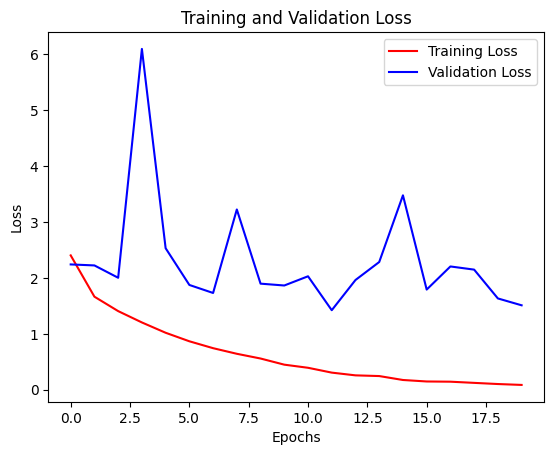

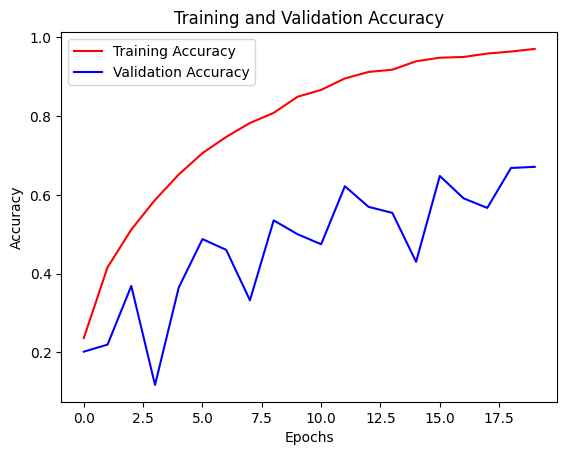

In [14]:
from matplotlib import pyplot as plt

train_loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

train_acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')

epochs = range(len(train_loss))

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
